In [1]:
import ee
#4/1AQlEd8xXyeEJtn2YMnZsA97wCZjvB2bAXvFKvabC1vdBjfyqIYbefL385iY
#ee.Authenticate(auth_mode='notebook')
ee.Initialize()

In [2]:
import numpy as np
import datetime 
import geemap

import os
import json
import retry
import shutil
import requests
from mgrs import getMGRS

def get_url(ee_img, scale = 0, out_format = 'GEOTiff', bands = ['B1','B2','B3','B4','B5','B8']):
    
    image = ee.Image(ee_img)
    info  = ee_img.getInfo()
    #crs   = image.projection() 
    crs = 'EPSG:4326'
    #else:
    #        if args.grid_key[-1] <= 'M':
    #            crs = "EPSG:327" + args.grid_key[:-1]
    #        else:
    #            crs = "EPSG:326" + args.grid_key[:-1]
    image = image.multiply(255/0.3).toByte()
    image = image.clip(image.geometry())
    '''
    url = image.getDownloadURL({
        'scale':scale,
        'format':out_format,
        'bands':bands,
        'crs':crs})
    '''
    url = None
    #print('URL',index,'done: ', url)
    return url, info

#@retry.retry(tries=10, delay=1, backoff=2)
def download_image(ee_img, index, out_dir):
    url, info = get_url(ee_img)
    date = info['properties']['DATE_ACQUIRED']
    
    print('Retrieved URL',index,':',url)
    img_save_path  = f'{out_dir}/{str(index).zfill(5)}_{str(date)}_img.tif'
    info_save_path = f'{out_dir}/{str(index).zfill(5)}_{str(date)}_img.json'
    #os.system(f'wget {url} -o {save_path}')
    '''
    r = requests.get(url, stream=True)
    print(r.status_code)
    if r.status_code !=200:
        r.raise_for_status()
    '''
    geemap.ee_export_image(ee.Image(ee_img), img_save_path, scale = 150, crs = 'EPSG:4326')
    #with open(os.path.join(out_path,out_name),'wb') as out_file:
    #    shutil.copyfileobj(r.raw, out_file)
    with open(info_save_path,'w') as file:
        json.dump(info,file)
    
start_date = datetime.datetime.strptime('13/01/01 00:00:00','%y/%m/%d %H:%M:%S')
grid = getMGRS()
coor = np.array([grid['45Q'], grid['46R'], grid['45Q'], grid['46R']])
box  = [coor[:,[0,2]].min(), coor[:,[0,2]].max(), coor[:,[1,3]].min(), coor[:,[1,3]].max()]
save_dir = 'bd_4546QR'
for i in range(0,(12*365)//16):
    print(start_date, box)
    
    end_date   = start_date+datetime.timedelta(days=16)
    # 'LANDSAT/LC08/C02/T1'
    lsat_coll = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA').filterDate(str(start_date).split(' ')[0], str(end_date).split(' ')[0])
    lsat_coll = lsat_coll.filter(ee.Filter.lt('CLOUD_COVER',30))
    lsat_coll = lsat_coll.select(['B3','B4','B5'])
    lsat_coll = lsat_coll.sort('DATE_ACQUIRED')
    #rect = ee.Geometry.Rectangle([91.196574, 23.468491, 91.201391, 23.474694])
    rect = ee.Geometry.Rectangle([84, 16, 96, 32])
    #rect = ee.Filter.bounds(rect)
    #landsatCollection.filterBounds(rect)
    lsat_coll =  lsat_coll.filterBounds(rect)
    im_list   = lsat_coll.toList(500)
    for j in range(im_list.size().getInfo()):
        ee_img = im_list.get(j)
        out_dir = f"{save_dir}/{str(start_date).split(' ')[0]}"
        os.makedirs(out_dir,exist_ok = True)
        download_image(ee_img, j, out_dir)
    start_date = end_date

2013-01-01 00:00:00 [84, 96, 16, 32]
2013-01-17 00:00:00 [84, 96, 16, 32]
2013-02-02 00:00:00 [84, 96, 16, 32]
2013-02-18 00:00:00 [84, 96, 16, 32]
2013-03-06 00:00:00 [84, 96, 16, 32]
Retrieved URL 0 : None
Generating URL ...
Please wait ...
Data downloaded to /projects/Deep-Learning-For-Remote-Sensing/bd_4546QR/2013-03-06/00000_2013-03-21_img.tif
Retrieved URL 1 : None
Generating URL ...
Please wait ...
Data downloaded to /projects/Deep-Learning-For-Remote-Sensing/bd_4546QR/2013-03-06/00001_2013-03-21_img.tif
Retrieved URL 2 : None
Generating URL ...
Please wait ...
Data downloaded to /projects/Deep-Learning-For-Remote-Sensing/bd_4546QR/2013-03-06/00002_2013-03-21_img.tif
Retrieved URL 3 : None
Generating URL ...
Please wait ...
Data downloaded to /projects/Deep-Learning-For-Remote-Sensing/bd_4546QR/2013-03-06/00003_2013-03-21_img.tif
2013-03-22 00:00:00 [84, 96, 16, 32]
Retrieved URL 0 : None
Generating URL ...
Please wait ...
Data downloaded to /projects/Deep-Learning-For-Remote-Se

OSError: [Errno 28] No space left on device

In [1]:
72963000 / 50331648

1.4496445655822754

In [6]:
str(start_date).split(' ')[0], str(end_date).split(' ')[0]

('2013-03-06', '2013-04-07')

In [3]:
im_list.size().getInfo()

27

In [3]:
str(start_date).split(' ')[0], str(end_date).split(' ')[0]

('2013-01-17', '2013-01-17')

In [18]:
#88.0844222351, 20.670883287, 92.6727209818, 26.4465255803
#https://github.com/CMUAbstract/eedl
#!python3 eedl.py -b 88.0844222351, 20.670883287, 92.6727209818, 26.4465255803 -i 2010 -f 2024 -s 164 -m 100 -o bd_100
!python3 eedl.py -b 88.0844222351, 20.670883287, 92.6727209818, 26.4465255803 -i 2013-01 -f 2013 -s 164 -m 100 -o bd_100

usage: eedl.py [-h] [-b BOUNDS [BOUNDS ...]] [-g GRID_KEY] [-i IDATE]
               [-f FDATE] [-s SCALE] [-m MAXIMS] [-se {l8,l9,s2}] [-o OUTPATH]
               [-r REGION] [-e {GEOTiff}] [-sd SEED] [-c CRS]
               [-cc CLOUD_COVER_MAX] [-ccgt CLOUD_COVER_MIN]
               [-ba BANDS [BANDS ...]] [-cm CUSTOM_MOSAICS]
               [-vb VERTICAL_BUFFER] [-hb HORIZONTAL_BUFFER] [-gd GDRIVE]
               [-np NPROCS] [-rm REGION_MOSAIC] [-rc REGION_COMPOSITE]
eedl.py: error: argument -b/--bounds: invalid int value: '88.0844222351,'


In [20]:
import ee
import geemap

ee.Initialize()
# Load a NAIP quarter quad, display.
#naip = ee.Image('USDA/NAIP/DOQQ/m_4207148_nw_19_1_20120710')
lsat_coll = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA').filterDate('2013-01-01', '2014-01-01')
lsat_coll = lsat_coll.filter(ee.Filter.lt('CLOUD_COVER',30))
rect      = ee.Geometry.Rectangle([88.0844222351, 20.670883287, 92.6727209818, 26.4465255803])

#rect      = ee.Geometry.Rectangle([91.196574, 23.468491, 91.201391, 23.474694])
#lsat_coll = lsat_coll.select(['B2','B3','B4','B5'])
lsat_coll = lsat_coll.sort('DATE_ACQUIRED')
lsat_coll = lsat_coll.filterBounds(rect)
im_list   = lsat_coll.toList(1000)
img_col   = []
for i in range(im_list.size().getInfo()):
    naip = ee.Image(im_list.get(i))
    m = geemap.Map()
    #m.set_center(91.20, 23.47, 14)
    m.add_layer(naip, {}, 'NAIP DOQQ')
    
    # Create the NDVI and NDWI spectral indices.
    ndvi = naip.normalizedDifference(['B5', 'B4']) # n, R
    ndwi = naip.normalizedDifference(['B3', 'B5']) # G, n
    
    # Create some binary images from thresholds on the indices.
    # This threshold is designed to detect bare land.
    bare_1 = ndvi.lt(0.2).And(ndwi.lt(0.3))
    # This detects bare land with lower sensitivity. It also detects shadows.
    bare_2 = ndvi.lt(0.2).And(ndwi.lt(0.8))
    
    img_col.append([
        naip
        ## NDWI > 0.5 is water. Visualize it with a blue palette.
        #ndwi.updateMask(ndwi.gte(0.5)).visualize(
        #    min=0.5, max=1, palette=['00FFFF', '0000FF']
        #),
        ## NDVI > 0.2 is vegetation. Visualize it with a green palette.
        #ndvi.updateMask(ndvi.gte(0.2)).visualize(
        #    min=-1, max=1, palette=['FF0000', '00FF00']
        #),
        ## Visualize bare areas with shadow (bare_2 but not bare_1) as gray.
        #bare_2.updateMask(bare_2.And(bare_1.Not())).visualize(palette=['AAAAAA']),
        ## Visualize the other bare areas as white.
        #bare_1.updateMask(bare_1).visualize(palette=['FFFFFF']),
        
    ])

# Mask and mosaic visualization images. The last layer is on top.
mosaic = ee.ImageCollection(img_col).mosaic()
m.add_layer(mosaic, {}, 'Visualization mosaic')
m

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [21]:
config = {
    'folder': 'gee_images',
    'scale': 300,
    'region': roi
}
task = ee.batch.(im_list.get(0), 'test_image', config)
task.start()

AttributeError: 'ComputedObject' object has no attribute 'prepare_for_export'

In [13]:
img_col_exp = ee.ImageCollection(img_col)
geemap.ee_export_image_collection(img_col_exp,'bd_test/', scale= 100)

Total number of images: 110

Exporting 1/110: bd_test/0.tif
Generating URL ...
Please wait ...
Data downloaded to /projects/Deep-Learning-For-Remote-Sensing/bd_test/0.tif


Exporting 2/110: bd_test/1.tif
Generating URL ...
Please wait ...
Data downloaded to /projects/Deep-Learning-For-Remote-Sensing/bd_test/1.tif


Exporting 3/110: bd_test/2.tif
Generating URL ...
Please wait ...
Data downloaded to /projects/Deep-Learning-For-Remote-Sensing/bd_test/2.tif


Exporting 4/110: bd_test/3.tif
Generating URL ...
Please wait ...


KeyboardInterrupt: 

In [18]:
img.getInfo()

EEException: Image.loadGeoTIFF: Invalid GCS URL: "bd_test/0.tif". Expected something of the form "gs://bucket/path/to/object".

In [19]:
import glob
imgs = glob.glob('45R_100/*tif')
for i,img in enumerate(imgs):
    naip = ee.Image.loadGeoTIFF('bd_test/0.tif')
    m = geemap.Map()
    #m.set_center(91.20, 23.47, 14)
    m.add_layer(naip, {}, 'NAIP DOQQ')
    
    # Create the NDVI and NDWI spectral indices.
    ndvi = naip.normalizedDifference(['B5', 'B4']) # n, R
    ndwi = naip.normalizedDifference(['B3', 'B5']) # G, n
    
    # Create some binary images from thresholds on the indices.
    # This threshold is designed to detect bare land.
    bare_1 = ndvi.lt(0.2).And(ndwi.lt(0.3))
    # This detects bare land with lower sensitivity. It also detects shadows.
    bare_2 = ndvi.lt(0.2).And(ndwi.lt(0.8))
    
    img_col.append([
        
        ## NDWI > 0.5 is water. Visualize it with a blue palette.
        #ndwi.updateMask(ndwi.gte(0.5)).visualize(
        #    min=0.5, max=1, palette=['00FFFF', '0000FF']
        #),
        ## NDVI > 0.2 is vegetation. Visualize it with a green palette.
        ndvi.updateMask(ndvi.gte(0.2)).visualize(
            min=-1, max=1, palette=['FF0000', '00FF00']
        ),
        ## Visualize bare areas with shadow (bare_2 but not bare_1) as gray.
        #bare_2.updateMask(bare_2.And(bare_1.Not())).visualize(palette=['AAAAAA']),
        ## Visualize the other bare areas as white.
        #bare_1.updateMask(bare_1).visualize(palette=['FFFFFF']),
        
    ])

# Mask and mosaic visualization images. The last layer is on top.
mosaic = ee.ImageCollection(img_col).mosaic()
m.add_layer(mosaic, {}, 'Visualization mosaic')
m

EEException: Image.loadGeoTIFF: Invalid GCS URL: "bd_test/0.tif". Expected something of the form "gs://bucket/path/to/object".

In [11]:
img = geemap.open_('45R_100/l8_45R_00000.tif')

url must start with http.


In [10]:
img.getInfo()

EEException: Image.load: Image asset '45R_100/l8_45R_00000.tif' not found (does not exist or caller does not have access).

In [12]:
import ee
import geetools
# AUTHENTICATE WITH GUI OR SERVICE ACCOUNT HERE:
# ...
# Define the ImageCollection and Image
roi = ee.Geometry.Rectangle([88.0844222351, 20.670883287, 92.6727209818, 26.4465255803])
collection = (ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA')
                .filterDate('2013-01-01', '2013-03-01')
                .filter(ee.Filter.lt('CLOUD_COVER', 5))
                .filterBounds(roi))
# Export the ImageCollection
tasks = geetools.batch.Export.imagecollection.toDrive(
    collection=collection,
    folder='gee_images',
    region=roi,
    namePattern='{id}',
    scale=30,
    dataType='uint32',
    verbose=True,
    maxPixels=int(1e13)
)

AttributeError: module 'geetools' has no attribute 'batch'

In [ ]:
geetools.

In [53]:
#naip = ee.Image(mosaic)
geemap.ee_export_image(mosaic,'test.tif', region = [91.1, 23.2, 91.2, 24.6], scale  = 1000)

Generating URL ...
Please wait ...
Data downloaded to /projects/Deep-Learning-For-Remote-Sensing/test.tif


In [ ]:
jupyter labextension enable --py --sys-prefix ipyleaflet

In [13]:
# Load a Landsat image.
img = ee.Image('LANDSAT/LT05/C02/T1_L2/LT05_034033_20000913').filterDate('2018-01-01', '2018-12-31')

# Print image object WITHOUT call to getInfo(); prints serialized request instructions.
#print(img)
url = img.getDownloadUrl()
# Print image object WITH call to getInfo(); prints image metadata.
#print(img.getInfo())

AttributeError: 'Image' object has no attribute 'filterDate'

Output(layout=Layout(width='815px'))

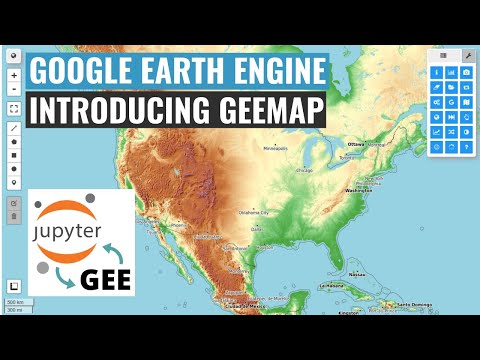

OpenStreetMap
Esri.WorldStreetMap
Esri.WorldImagery
Esri.WorldTopoMap
FWS NWI Wetlands
FWS NWI Wetlands Raster
NLCD 2021 CONUS Land Cover
NLCD 2019 CONUS Land Cover
NLCD 2016 CONUS Land Cover
NLCD 2013 CONUS Land Cover
NLCD 2011 CONUS Land Cover
NLCD 2008 CONUS Land Cover
NLCD 2006 CONUS Land Cover
NLCD 2004 CONUS Land Cover
NLCD 2001 CONUS Land Cover
USGS NAIP Imagery
USGS NAIP Imagery False Color
USGS NAIP Imagery NDVI
USGS Hydrography
USGS 3DEP Elevation
ESA Worldcover 2020
ESA Worldcover 2020 S2 FCC
ESA Worldcover 2020 S2 TCC
ESA Worldcover 2021
ESA Worldcover 2021 S2 FCC
ESA Worldcover 2021 S2 TCC
BaseMapDE.Color
BaseMapDE.Grey
BasemapAT.basemap
BasemapAT.grau
BasemapAT.highdpi
BasemapAT.orthofoto
BasemapAT.overlay
BasemapAT.surface
BasemapAT.terrain
CartoDB.DarkMatter
CartoDB.DarkMatterNoLabels
CartoDB.DarkMatterOnlyLabels
CartoDB.Positron
CartoDB.PositronNoLabels
CartoDB.PositronOnlyLabels
CartoDB.Voyager
CartoDB.VoyagerLabelsUnder
CartoDB.VoyagerNoLabels
CartoDB.VoyagerOnlyLabe

In [9]:
# !pip install geemap
import geemap
geemap.show_youtube("h0pz3S6Tvx0")
Map = geemap.Map(center=(40, -100), zoom=4)
Map
Map.add_basemap("HYBRID")
basemaps = geemap.basemaps
for basemap in basemaps:
    print(basemap)
Map.add_basemap("OpenTopoMap")

In [7]:
# Initialize a map object.
m = geemap.Map()

# Define an example image.
img = ee.Image.random()

# Add the image to the map.
m.add_layer(img, None, 'Random image')

# Display the map (you can call the object directly if it is the final line).
display(m)

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [11]:
from matplotlib import pyplot as plt


EEException: Total request size (3036739552 bytes) must be less than or equal to 50331648 bytes.

In [ ]:
composite = ee.Algorithms.Landsat.simpleComposite(
  collection=landsatCollection,
  asFloat=True
);

# Use geemap to visualize the imagery.
Map = geemap.Map(center=(37.8, -122.5), zoom=12)

Map.addLayer(
    composite,
    {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3},
    'median composite',
    True)

endpoint_path = (
    'projects/' + PROJECT + '/locations/' + REGION + '/endpoints/' + str(ENDPOINT_NAME))

# Connect to the hosted model.
vertex_model = ee.Model.fromVertexAi(
  endpoint=endpoint_path,
  inputTileSize=[50, 50],
  proj=ee.Projection('EPSG:4326').atScale(30),
  fixInputProj=True,
  outputBands={'output': {
      'type': ee.PixelType.float(),
      'dimensions': 0
    }},
  payloadFormat='ND_ARRAYS'
  )

predictions = vertex_model.predictImage(composite.select(BANDS))

Map.addLayer(
    predictions,
    {'min': 0, 'max': 2, 'palette': ['red', 'green', 'blue']},
    'predictions',
    True)

Map